
 1.  Evaluation protocol - 1
	- What happens if we train and test on the same split of a dataset?
	- A brief discussion about why this is bad.

2. Evaluation protocol - 2
	- How do we divide a dataset into train/val/test splits?
	- Perform an experiment on breast cancer detection dataset using decision trees.
	- How to choose optimal hyperparameters using this method?
	- Discuss drawbacks for this method

3.  Evaluation protocol -3
	- K-fold Cross-validation with a toy example to show the splitting happens
	- Use cases of K-fold in three different tasks
		- Selection of hyperparameters for a random forest on car evaluation dataset
		- Model selection on the car evaluation dataset (LR  vs. DT)
		- Feature selection on the advertising dataset






##  Evluation Protocol - 1

### Train and test on the entire dataset

1. train a model on the **entire** dataset
2. test the model on the **same** dataset to evaluate how well the peforms 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

For this example, we will be using the breast cancer dataset. We will first separate out the feature (X) and target (y) and visualize their shapes.

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

print(f"# of Samples: {X.shape[0]} \n# of features: {X.shape[1]}")

# of Samples: 569 
# of features: 30


Now, let's train the classifier and see the accuracy.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

predictions = clf.predict(X)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

We will evaluate the classifier in terms of the accuracy metric as this is a classification task.

Note that, we are evaluating on the same set of data on which we have trained our model. So, this accuracy is knows as **training accuracy**.

In [ ]:
from sklearn import metrics
print(f"Training Accuracy: {metrics.accuracy_score(y, predictions) * 100}")

Training Accuracy: 100.0


## Problem with training and testing on the same data

- Our goal when evaluating a model should be estimate the likely performance of the model on the **out-of-sample** data.
- But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
- Unnecessarily complex models overfit the training data

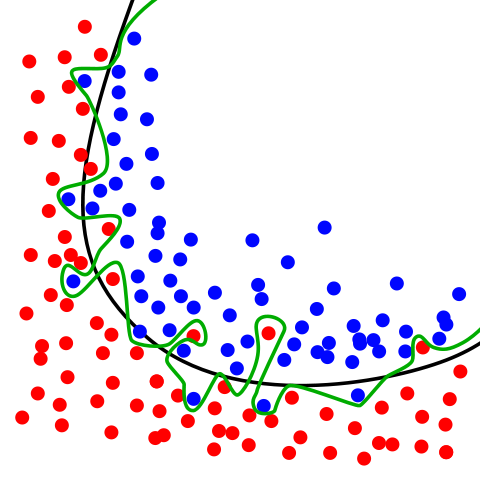

Image Credit: Overfitting by Chabacano. 

## Evaluation Procedure - 2

We will create separarate train/test split. We train the model on the train split and test on the test split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

Carefully observe the shape of the train and test split now

In [ ]:
print(f"# of samples before splitting: {X.shape[0]}")
print(f"# of training samples: {X_train.shape[0]}")
print(f"# of test samples: {X_test.shape[0]}")

# of samples before splitting: 569
# of training samples: 341
# of test samples: 228


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(predictions)

[0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 1 1]


In [ ]:
from sklearn import metrics
print(f"Test Accuracy: {metrics.accuracy_score(y_test, predictions) * 100}")

Test Accuracy: 88.1578947368421


We choose hyperparameter based on the test/val accuracy. Below, we will see this.

For example, one of the hyper-parameters for decision trees is *max_depth*. We will select the optimal value of *max_depth* based on the test accuracy. 

In [ ]:
# try max_depth = 1 through 20 and record testing accuracy
max_depth_range = list(range(1, 20))
scores = []
for k in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

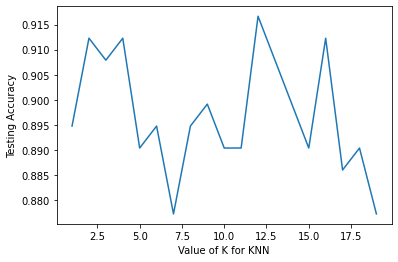

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(max_depth_range, scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Testing Accuracy')

From the plot, we can see *max_depth = 12* gives the best test accuracy. So, we will choose this value for this dataset.

In summary,

- **Training accuracy** rises as model **complexity increases**
- **Testing accuracy** *penalizes* models that are **too complex or not complex enough**

## What are the downsides of train/test split?
- Provides a high-variance estimate of out-of-sample accuracy [since changing which observations happen to be in the testing set can significantly change testing accuracy]
- K-fold cross-validation overcomes this limitation
- But, train/test split is still useful because of its flexibility and speed

## Evlaution Protocol - 3

K-fold Cross Validation


What if we had multiple train and test splits of a the same dataset? We could average the test accuracies accross these multiple datasets. This could reduce the variance in estimating the classifier. Right? This is the motivation of the cross-validation.

1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

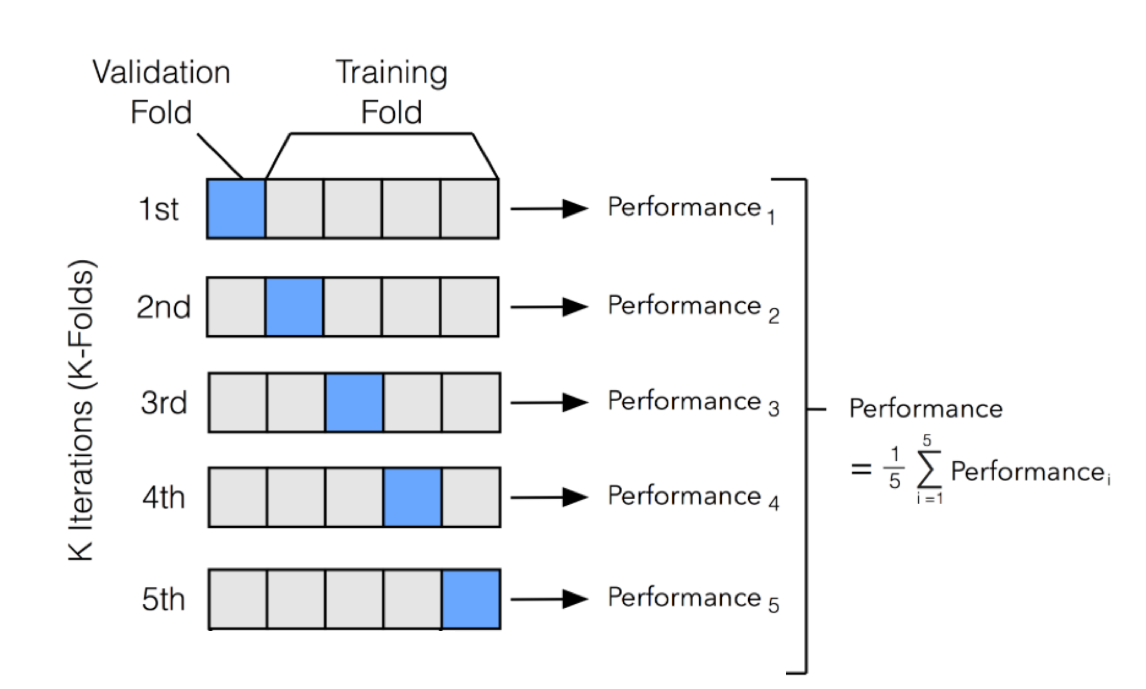

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


## Hyperparameter tuning of RandomForest using k-fold cross-validation

We will select the best hyperparameter *n_estimators* for a randomforest classifier. For this example, we will use the *car_evaluation* dataset from the previous class.

In [ ]:
# download the car evaluation dataset
! wget "https://iiitaphyd-my.sharepoint.com/:x:/g/personal/avijit_dasgupta_research_iiit_ac_in/EbSsNblEi_tBsApvJQpKrHkB7KHQ6_wFnRbUEjarXG0QdQ?e=wJCyKf&download=1" -O car_evaluation.csv

--2022-02-25 07:41:46--  https://iiitaphyd-my.sharepoint.com/:x:/g/personal/avijit_dasgupta_research_iiit_ac_in/EbSsNblEi_tBsApvJQpKrHkB7KHQ6_wFnRbUEjarXG0QdQ?e=wJCyKf&download=1
Resolving iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/car_evaluation.csv [following]
--2022-02-25 07:41:47--  https://iiitaphyd-my.sharepoint.com/personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/car_evaluation.csv
Reusing existing connection to iiitaphyd-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [application/octet-stream]
Saving to: ‘car_evaluation.csv’

car_evaluation.csv  100%[===================>]  52.34K   242KB/s    in 0.2s    

2022-02-25 07:41:48 (242 KB/s) - ‘car_evaluatio

In [ ]:
import pandas as pd
# Data exploration [car evaluation]
# read the csv file
car_evaluation_df = pd.read_csv('car_evaluation.csv')
# adding column names for the ease of understanding
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_evaluation_df.columns = col_names


# print some rows of the dataset to better understand the dataframe
car_evaluation_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
X = car_evaluation_df.drop(['class'], axis=1)
y = car_evaluation_df['class']

encoder = OrdinalEncoder()
encoder.fit(X)
X = encoder.transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

k_range = list(range(1, 50))

k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8205303132141417, 0.8084050275574673, 0.7933290764887754, 0.8194548998521307, 0.8373706143298829, 0.8218174485817986, 0.8362515123000405, 0.8443339158489044, 0.8356768382847157, 0.855955101492136, 0.8512972173679259, 0.8570842855222477, 0.8547755074606801, 0.8461049872294663, 0.8414874311063315, 0.8518685307164942, 0.8408959537572255, 0.8484070439575213, 0.8449153111977417, 0.8338889635703725, 0.8530548460814625, 0.8391248823766635, 0.860562575615002, 0.8478122059416588, 0.8553501814760048, 0.8489749966393333, 0.852493614733163, 0.8466662185777659, 0.8495597526549268, 0.8535858314289555, 0.8576656808710847, 0.8535959134292244, 0.8483801586234708, 0.8477853206076086, 0.8559046914907918, 0.8547587041268988, 0.8437659631670924, 0.8547822287941929, 0.8495496706546579, 0.8495530313214141, 0.8466561365774969, 0.8408421830891248, 0.8454933458798225, 0.8547654254604113, 0.8501209840032263, 0.8559147734910606, 0.8506754940180132, 0.8518819733835192, 0.8576589595375722]


Let's  plot the cross-validation scores and see which value of n_estimators gives highest cross-val accuracy.

Text(0, 0.5, 'Cross-Validated Accuracy')

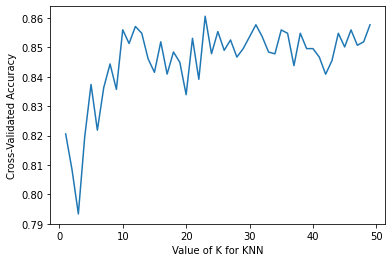

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')

## Model selection using Cross-validation

We can compare two models based on the cross_val score and choose the best one.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print(f" Cross-validation score for Logistic Regression : {cross_val_score(lr, X, y, cv=10, scoring='accuracy').mean() * 100}")

 Cross-validation score for Logistic Regression : 65.49166554644442


In [ ]:
from sklearn.linear_model import LogisticRegression
dt = DecisionTreeClassifier()
print(f" Cross-validation score for Decision Tree : {cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean() * 100}")

 Cross-validation score for Logistic Regression : 86.4034144374244


The decision tree gives better cross-validation score than the logistic regression. So, we choose the decision tree.


## Feature Selection using Cross-validation

We can also select which features are important for our task using the cross-validation. We will see this here.

In [ ]:
# download the advertising data
! wget "https://iiitaphyd-my.sharepoint.com/:t:/g/personal/avijit_dasgupta_research_iiit_ac_in/EaupiKrbbAtPiEA6X8S07LQBUOD6ojKTVCYIAF_Mw2e5bQ?e=b4oTJh&download=1" -O advertising.csv

--2022-02-26 12:05:25--  https://iiitaphyd-my.sharepoint.com/:t:/g/personal/avijit_dasgupta_research_iiit_ac_in/EaupiKrbbAtPiEA6X8S07LQBUOD6ojKTVCYIAF_Mw2e5bQ?e=b4oTJh&download=1
Resolving iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/advertising.txt [following]
--2022-02-26 12:05:25--  https://iiitaphyd-my.sharepoint.com/personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/advertising.txt
Reusing existing connection to iiitaphyd-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 4754 (4.6K) [text/plain]
Saving to: ‘advertising.csv’

advertising.csv     100%[===================>]   4.64K  --.-KB/s    in 0s      

2022-02-26 12:05:26 (66.7 MB/s) - ‘advertising.csv’ saved [4754/4754]


In [ ]:
import pandas as pd
data = pd.read_csv('advertising.csv', index_col=0)
feature_cols = ['TV', 'Radio', 'Newspaper']

# create the feature vectors
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(- scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [ ]:
import numpy as np
# convert from MSE to RMSE
rmse_scores = np.sqrt(- scores)
# calculate the average RMSE
print(rmse_scores.mean())


1.6913531708051792


Now, let's remove the Newspaper feature and see if we can get better cv score. 

In [ ]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
# convert from MSE to RMSE
rmse_scores = np.sqrt(- scores)
# calculate the average RMSE
print(rmse_scores.mean())

1.6796748419090766
